# 技術領袖培訓全域班 - 機器學習 Kaggle 實戰
## 建模流程索引:
> 1. [資料前處理](#1.資料前處理)
> 2. [特徵工程](#2.特徵工程)
> 3. [模型驗證](#3.模型驗證)
> 4. [模型集成](#4.模型集成)

### 資料特徵說明
---
* `SalePrice`: 房屋成交價，也是此次任務的預測目標
---
* `MSSubClass`: 建築類型
* `MSZoning`: 用地類型
* `LotFrontage`: 土地面向街道的長度
* `LotArea`: 土地面積
* `Street`: 街道鋪設類型
* `Alley`: 巷弄鋪設類型
* `LotShape`: 物業形狀
* `LandContour`: 物業平坦度
* `Utilities`: 提供的水電設備
* `LotConfig`: 空地設置
* `LandSlope`: 土地斜度
* `Neighborhood`: 在市區位置
* `Condition1`: 靠近主要公路條件
* `Condition2`: 靠近次要公路條件
* `BldgType`: 住宅類型
* `HouseStyle`: 住宅風格
---
* `OverallQual`: 建材品質
* `OverallCond`: 整體品質評分
* `YearBuilt`: 建設日期
* `YearRemodAdd`: 翻修日期
* `RoofStyle`: 屋頂類型
* `RoofMatl`: 屋頂材質
* `Exterior1st`: 房屋表面主要材質
* `Exterior2nd`: 房屋表面次要材質
* `MasVnrType`: 屋內裝潢材質類型
* `MasVnrArea`: 裝潢面積
* `ExterQual`: 外部材質品質 
* `ExterCond`: 外部材質現況 
* `Foundation`: 建材類型 
---
* `BsmtQual`: 地下層高度 
* `BsmtCond`: 地下層狀況 
* `BsmtExposure`: 地下層對外通風品質 
* `BsmtFinType1`: 地下層居住品質 
* `BsmtFinSF1`: 地下層第一處面積 
* `BsmtFinType2`: 地下層第二處生活品質 
* `BsmtFinSF2`: 地下層第二處面積 
* `BsmtUnfSF`: 未完成地下層面積 
* `TotalBsmtSF`: 地下層總面積 
---
* `Heating`: 暖氣類型 
* `HeatingQC`: 暖氣品質 
* `CentralAir`: 是否有中央空調 
* `Electrical`: 電機系統 
* `1stFlrSF`: 一樓面積 
* `2ndFlrSF`: 二樓面積 
* `LowQualFinSF`: 低品質所佔的樓層面積 
* `GrLivArea`: 地面層生活面積 
---
* `BsmtFullBath`: 地下層整間浴室 
* `BsmtHalfBath`: 地下層半間浴室 
* `FullBath`: 地上層整間浴室 
* `HalfBath`: 地上層半間浴室 
* `Bedroom`: 地上層房間數 
* `Kitchen`: 廚房數 
* `KitchenQual`: 廚房品質 
* `TotRmsAbvGrd`: 不含浴室地上房間數 
* `Functional`: 房屋功能性評分 
* `Fireplaces`: 壁火爐數量 
* `FireplaceQu`: 壁火爐品質 
---
* `GarageType`: 車庫在房屋位置 
* `GarageYrBlt`: 車庫建造年份 
* `GarageFinish`: 車庫內裝潢完整度 
* `GarageCars`: 車庫內停車空間 
* `GarageArea`: 車庫面積 
* `GarageQual`: 車庫品質 
* `GarageCond`: 車庫條件 
---
* `PavedDrive`: 車道鋪設材質 
* `WoodDeckSF`: 木製平台面積 
* `OpenPorchSF`: 門廊面積 
* `EnclosedPorch`: 封閉式門廊面積 
* `3SsnPorch`: 三季門廊面積 
* `ScreenPorch`: screen porch面積 
* `PoolArea`: 泳池面積 
* `PoolQC`: 泳池品質 
* `Fence`: 柵欄品質 
* `MiscFeature`: 其它特徵 
* `MiscVal`: 其它特徵值 
---
* `MoSold`: 賣出月份 
* `YrSold`: 賣出年份 
* `SaleType`: 賣出類型 
* `SaleCondition`: 賣出條件 
---

## 1.資料前處理

### 【了解資料】

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

plt.style.use('ggplot')
sns.set_style('whitegrid')

### 讀入資料

In [2]:
train_path = './train.csv'
test_path = './test.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

print('Size of Training Set:', train_df.shape[0], 'houses', 'and', train_df.shape[1], 'features')
print('Size of Testing Set:', test_df.shape[0], 'houses', 'and', test_df.shape[1], 'features')
print('Target Variable: SalePrice')

Size of Training Set: 1460 houses and 81 features
Size of Testing Set: 1459 houses and 80 features
Target Variable: SalePrice


### 資料型態

除了數值型 (integer, float) 外，也有不少字串型變數。

In [3]:
train_df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 81 entries, Id to SalePrice
dtypes: float64(3), int64(35), object(43)
memory usage: 924.0+ KB


In [4]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 【缺失值處理】

### 觀察要補值的欄位型態

可以看到，需要補值的欄位，有數值型的，也有字串型的。

In [5]:
train_df_na_cols = set(train_df.columns.values[train_df.isnull().any()])
test_df_na_cols = set(test_df.columns.values[test_df.isnull().any()])

cols = list(set(train_df_na_cols).union(test_df_na_cols))
train_df[cols].info(verbose=False)

cat_cols = train_df[cols].select_dtypes(include='object').columns.values
num_cols = train_df[cols].select_dtypes(exclude='object').columns.values

print(f'\nNA cols remains: {len(cat_cols)} string cols and  {len(num_cols)} numeric.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 34 entries, BsmtFinSF1 to Functional
dtypes: float64(3), int64(8), object(23)
memory usage: 387.9+ KB

NA cols remains: 23 string cols and  11 numeric.


In [6]:
cat_cols

array(['MSZoning', 'GarageFinish', 'Alley', 'KitchenQual', 'BsmtExposure',
       'BsmtQual', 'Utilities', 'GarageCond', 'Exterior2nd', 'BsmtCond',
       'Electrical', 'MiscFeature', 'PoolQC', 'GarageQual', 'Exterior1st',
       'BsmtFinType2', 'GarageType', 'BsmtFinType1', 'Fence',
       'MasVnrType', 'FireplaceQu', 'SaleType', 'Functional'],
      dtype=object)

In [7]:
num_cols

array(['BsmtFinSF1', 'MasVnrArea', 'TotalBsmtSF', 'LotFrontage',
       'GarageCars', 'GarageYrBlt', 'GarageArea', 'BsmtHalfBath',
       'BsmtFullBath', 'BsmtUnfSF', 'BsmtFinSF2'], dtype=object)

### 針對類別型欄位 - 以眾數進行補值

#### (類別型資料) 訓練資料集補值

In [8]:
train_df[cat_cols] = train_df[cat_cols].fillna(train_df[cat_cols].mode().iloc[0])

#### (類別型資料) 測試資料集補值

In [9]:
test_df[cat_cols] = test_df[cat_cols].fillna(test_df[cat_cols].mode().iloc[0])

### 針對數值型欄位 - 以 0 進行補值

#### (數值型資料) 訓練資料集補值

In [10]:
train_df[num_cols] = train_df[num_cols].fillna(value=0)

#### (數值型資料) 測試資料集補值

In [11]:
test_df[num_cols] = test_df[num_cols].fillna(value=0)

### 檢查資料集是否還有缺失值

In [12]:
print('Training set cols have missing values: ', sum(train_df.isnull().any()))
print('Testing set cols have missing values: ', sum(test_df.isnull().any()))

Training set cols have missing values:  0
Testing set cols have missing values:  0


<font size=5 color="red">
    <b>Strong Baseline:<br>
    </b>
</font>

<font size=3 color="red">
    ◈ 刪除過多缺失值的特徵欄位<br>
    ◈ 針對特徵補合理的值
</font>

---

## 2.特徵工程

### 【特徵轉換】

### 針對部份的數值欄位，將其轉換為類別欄位

有一些數值欄位，其實比較像是類別欄位，它們和目標變數並沒有相關性，因此最好將它們進行轉換。

1. 首先，先針對 MSSubClass(建築類型), OverallCond(建材品質), MoSold(賣出月份), YrSold(賣出年份)，這幾個都是其它 Blogger 已經確認需要轉為類別的變數<br/>
   ->> 參考：https://www.kaggle.com/eiosifov/non-logarithm-house-pricing-randomforestregressor#Dealing-with-categorical-values

2. 因此我們試著以相關係數，來找出哪些數值欄位，與目標變數的相關性小於絕對值 0.1

3. 例如，針對 BsmtHalfBath (地下層半間浴室)，可以看到訓練集和測試集，都只有三個值，因此將其轉為類別

4. 例如，針對 PoolArea (泳池面積)，因為我們看到它的值幾乎都是在 0，因此可以把這個欄位從訓練與測試集中刪除

#### 找出與目標變數的相關係數小於 0.1 的欄位名稱

In [13]:
train_df_corr = train_df.select_dtypes(include='integer').corr()['SalePrice']
values = train_df_corr[abs(train_df_corr) < 0.1].index.values

values

array(['Id', 'MSSubClass', 'OverallCond', 'BsmtFinSF2', 'LowQualFinSF',
       'BsmtHalfBath', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold',
       'YrSold'], dtype=object)

#### 搜尋 unique 數值過少的欄位名稱

在這裡我假定如果數值欄位的unique值過少，而且和target variable的相關性又太低，那麼它就應該可以被treated as categorical variable.

In [14]:
# 搜尋數值欄位的 unique value < 20個的欄位名
# MSSubClass(建築類型), OverallCond(建材品質), BsmtHalfBath(地下層半間浴室), 
# PoolArea(泳池面積), MoSold(賣出月份), YrSold(賣出年份)
num2cat = []
for val in values:
    if len(train_df[val].unique()) < 20:
        num2cat.append(val)

num2cat

['MSSubClass', 'OverallCond', 'BsmtHalfBath', 'PoolArea', 'MoSold', 'YrSold']

#### 例如，觀察 BsmtHalfBath 欄位，可以看到 SalePrice 和 BsmtHalfBath 的數值大小沒關連

In [15]:
val = 'BsmtHalfBath'
train_df[[val, 'SalePrice']].groupby([val]).agg({
    'SalePrice':'median',
    val:'count'
}).sort_values(by='SalePrice', ascending=False)

,SalePrice,BsmtHalfBath
BsmtHalfBath,,
0,163250.000,1378
2,160850.500,2
1,159000.000,80


#### 例如，觀察 PoolArea 欄位，可以看到 PoolArea 的數值幾乎集中在 0 一個值身上，可以把這個欄位可以刪掉

In [16]:
val = 'PoolArea'
train_df[[val, 'SalePrice']].groupby([val]).agg({
    'SalePrice':'median',
    val:'count'
}).sort_values(by='SalePrice', ascending=False)

,SalePrice,PoolArea
PoolArea,,
555,745000,1
738,274970,1
519,250000,1
512,235000,1
648,181000,1
576,171000,1
0,162900,1453
480,160000,1


In [17]:
num2cat

['MSSubClass', 'OverallCond', 'BsmtHalfBath', 'PoolArea', 'MoSold', 'YrSold']

#### 數值欄位轉類別

In [18]:
# 先將不需要用到的變數刪除
num2cat.remove('PoolArea')  # PoolArea(泳池面積) 看似不相關的數值變數，可刪除
num2cat.remove('OverallCond')  # OverallCond(建材品質) 屬於 ordinal variable
num2cat.remove('MoSold')  # MoSold(賣出月份) 屬於 ordinal variable 
num2cat.remove('YrSold')  # YrSold(賣出年份) 屬於 ordinal variable

num2cat

['MSSubClass', 'BsmtHalfBath']

In [19]:
# 剩下 MSSubClass(建築類型), BsmtHalfBath(地下層半間浴室)
# 將訓練集和測試集的 numerical feature 轉換為 string
for col in num2cat:
    train_df[col] = train_df[col].astype('str')
    test_df[col] = test_df[col].astype('str')

### 針對有順序性的變數，進行 OridinalEncode

參考其它Kernel作者，將這些欄位挑選出來，轉換有順序性的數值變數<br/>
->> https://github.com/Moeinh77/Kaggle-House-Prices-Advanced-Regression-Techniques/blob/master/data_pre_processing_housing_kaggle.ipynb

In [20]:
# BsmtQual(地下層高度), BsmtCond(地下層狀況), GarageQual(車庫品質), GarageCond(車庫條件)
# ExterQual(外部材質品質), ExterCond(外部材質狀況), HeatingQC(暖氣品質), KitchenQual(廚房品質)
# 以Ex, Gd, TA, Fa, Po來表示高低之分, NA為缺失值
ordi_cols_1 = ['BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond',
               'ExterQual', 'ExterCond', 'HeatingQC', 'KitchenQual']
for val in ordi_cols_1:
    train_df[val].replace(to_replace=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                          value=[0, 1, 2, 3, 4, 5],
                          inplace=True)
    test_df[val].replace(to_replace=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                          value=[0, 1, 2, 3, 4, 5],
                          inplace=True)

In [21]:
# BsmtFinType1(地下層居住品質), BsmtFinType2(地下層第二處生活品質)
# 以GLQ, ALQ, BLQ, Rec, LwQ, Unf來表示高低之分, NA為缺失值
ordi_cols_2 = ['BsmtFinType1', 'BsmtFinType2']
for val in ordi_cols_2:
    train_df[val].replace(to_replace=['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
                          value=[0, 1, 2, 3, 4, 5, 6],
                          inplace=True)
    test_df[val].replace(to_replace=['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
                          value=[0, 1, 2, 3, 4, 5, 6],
                          inplace=True)

In [22]:
# BsmtExposure(地下層對外通風品質), 以Gd, Av, Mn, No來表示高低之分, NA為缺失值
train_df['BsmtExposure'].replace(to_replace=['NA', 'No', 'Mn', 'Av', 'Gd'],
                                 value=[0, 1, 2, 3, 4],
                                 inplace=True)
test_df['BsmtExposure'].replace(to_replace=['NA', 'No', 'Mn', 'Av', 'Gd'],
                                 value=[0, 1, 2, 3, 4],
                                 inplace=True)

# CentralAir(是否有中央空調), Y為有，N為無，NA為缺失值
train_df['CentralAir'].replace(to_replace=['NA', 'N', 'Y'],
                               value=[0, 1, 2],
                               inplace=True)
test_df['CentralAir'].replace(to_replace=['NA', 'N', 'Y'],
                               value=[0, 1, 2],
                               inplace=True)

# Functional(房屋功能性評分), 以Typ, Min1, Min2, Mod, Maj1, Maj2, Sev, Sal來表示高低之分, NA為缺失值
train_df['Functional'].replace(to_replace=['NA', 'Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],
                               value=[0, 1, 2, 3, 4, 5, 6, 7, 8],
                               inplace=True)
test_df['Functional'].replace(to_replace=['NA', 'Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],
                               value=[0, 1, 2, 3, 4, 5, 6, 7, 8],
                               inplace=True)

# GarageFinish(車庫內裝潢完整度), 以Fin, RFn, Unf來表示高低之分, NA為缺失值
train_df['GarageFinish'].replace(to_replace=['NA', 'Unf', 'RFn', 'Fin'],
                                 value=[0, 1, 2, 3],
                                 inplace=True)
test_df['GarageFinish'].replace(to_replace=['NA', 'Unf', 'RFn', 'Fin'],
                                 value=[0, 1, 2, 3],
                                 inplace=True)

# LandSlope(土地斜度), 以Gtl, Mod, Sev來表示高低之分, NA為缺失值
train_df['LandSlope'].replace(to_replace=['NA', 'Sev', 'Mod', 'Gtl'],
                              value=[0, 1, 2, 3],
                              inplace=True)
test_df['LandSlope'].replace(to_replace=['NA', 'Sev', 'Mod', 'Gtl'],
                              value=[0, 1, 2, 3],
                              inplace=True)

# LotShape(物業形狀), 以Reg, IR1, IR2, IR3來表示高低之分, NA為缺失值
train_df['LotShape'].replace(to_replace=['NA', 'IR3', 'IR2', 'IR1', 'Reg'],
                             value=[0, 1, 2, 3, 4],
                             inplace=True)
test_df['LotShape'].replace(to_replace=['NA', 'IR3', 'IR2', 'IR1', 'Reg'],
                             value=[0, 1, 2, 3, 4],
                             inplace=True)

# PacedDrive(車道鋪設材質), 以Y, P, N來表示高低之分, NA為缺失值
train_df['PavedDrive'].replace(to_replace=['NA', 'N', 'P', 'Y'],
                               value=[0, 1, 2, 3],
                               inplace=True)
test_df['PavedDrive'].replace(to_replace=['NA', 'N', 'P', 'Y'],
                               value=[0, 1, 2, 3],
                               inplace=True)

# Street(街道鋪設類型), Pave為石塊路面, Grvl為碎石路面, NA為缺失值
train_df['Street'].replace(to_replace=['NA', 'Grvl', 'Pave'],
                           value=[0, 1, 2],
                           inplace=True)
test_df['Street'].replace(to_replace=['NA', 'Grvl', 'Pave'],
                           value=[0, 1, 2],
                           inplace=True)

### 觀察特徵相關性並畫出較高相關性的圖

In [23]:
# 下面計算在select_cols中，有多少個數值型欄位
train_df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 81 entries, Id to SalePrice
dtypes: float64(3), int64(50), object(28)
memory usage: 924.0+ KB


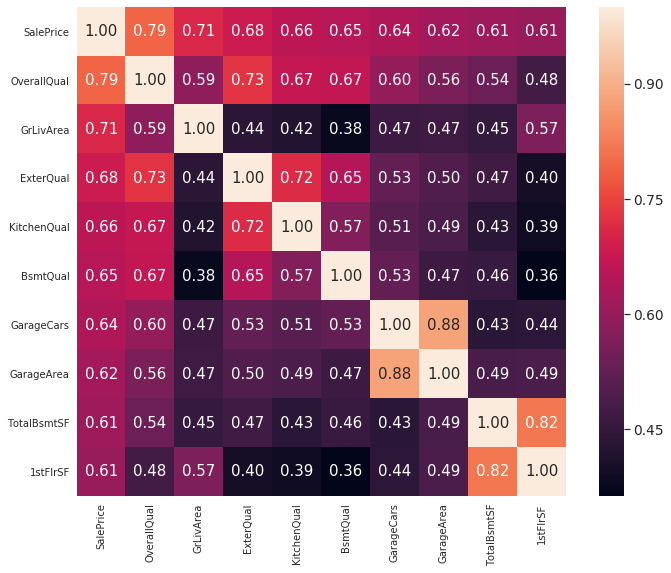

In [24]:
#saleprice correlation matrix
f1, ax = plt.subplots(figsize=(12, 9))
k = 10 #number of variables for heatmap
corrmat = train_df.corr()
col = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_df[col].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=col.values, xticklabels=col.values)
plt.show()

In [25]:
continuous = ['GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF']
discrete = ['OverallQual', 'ExterQual', 'KitchenQual', 'GarageCars', 'BsmtQual']

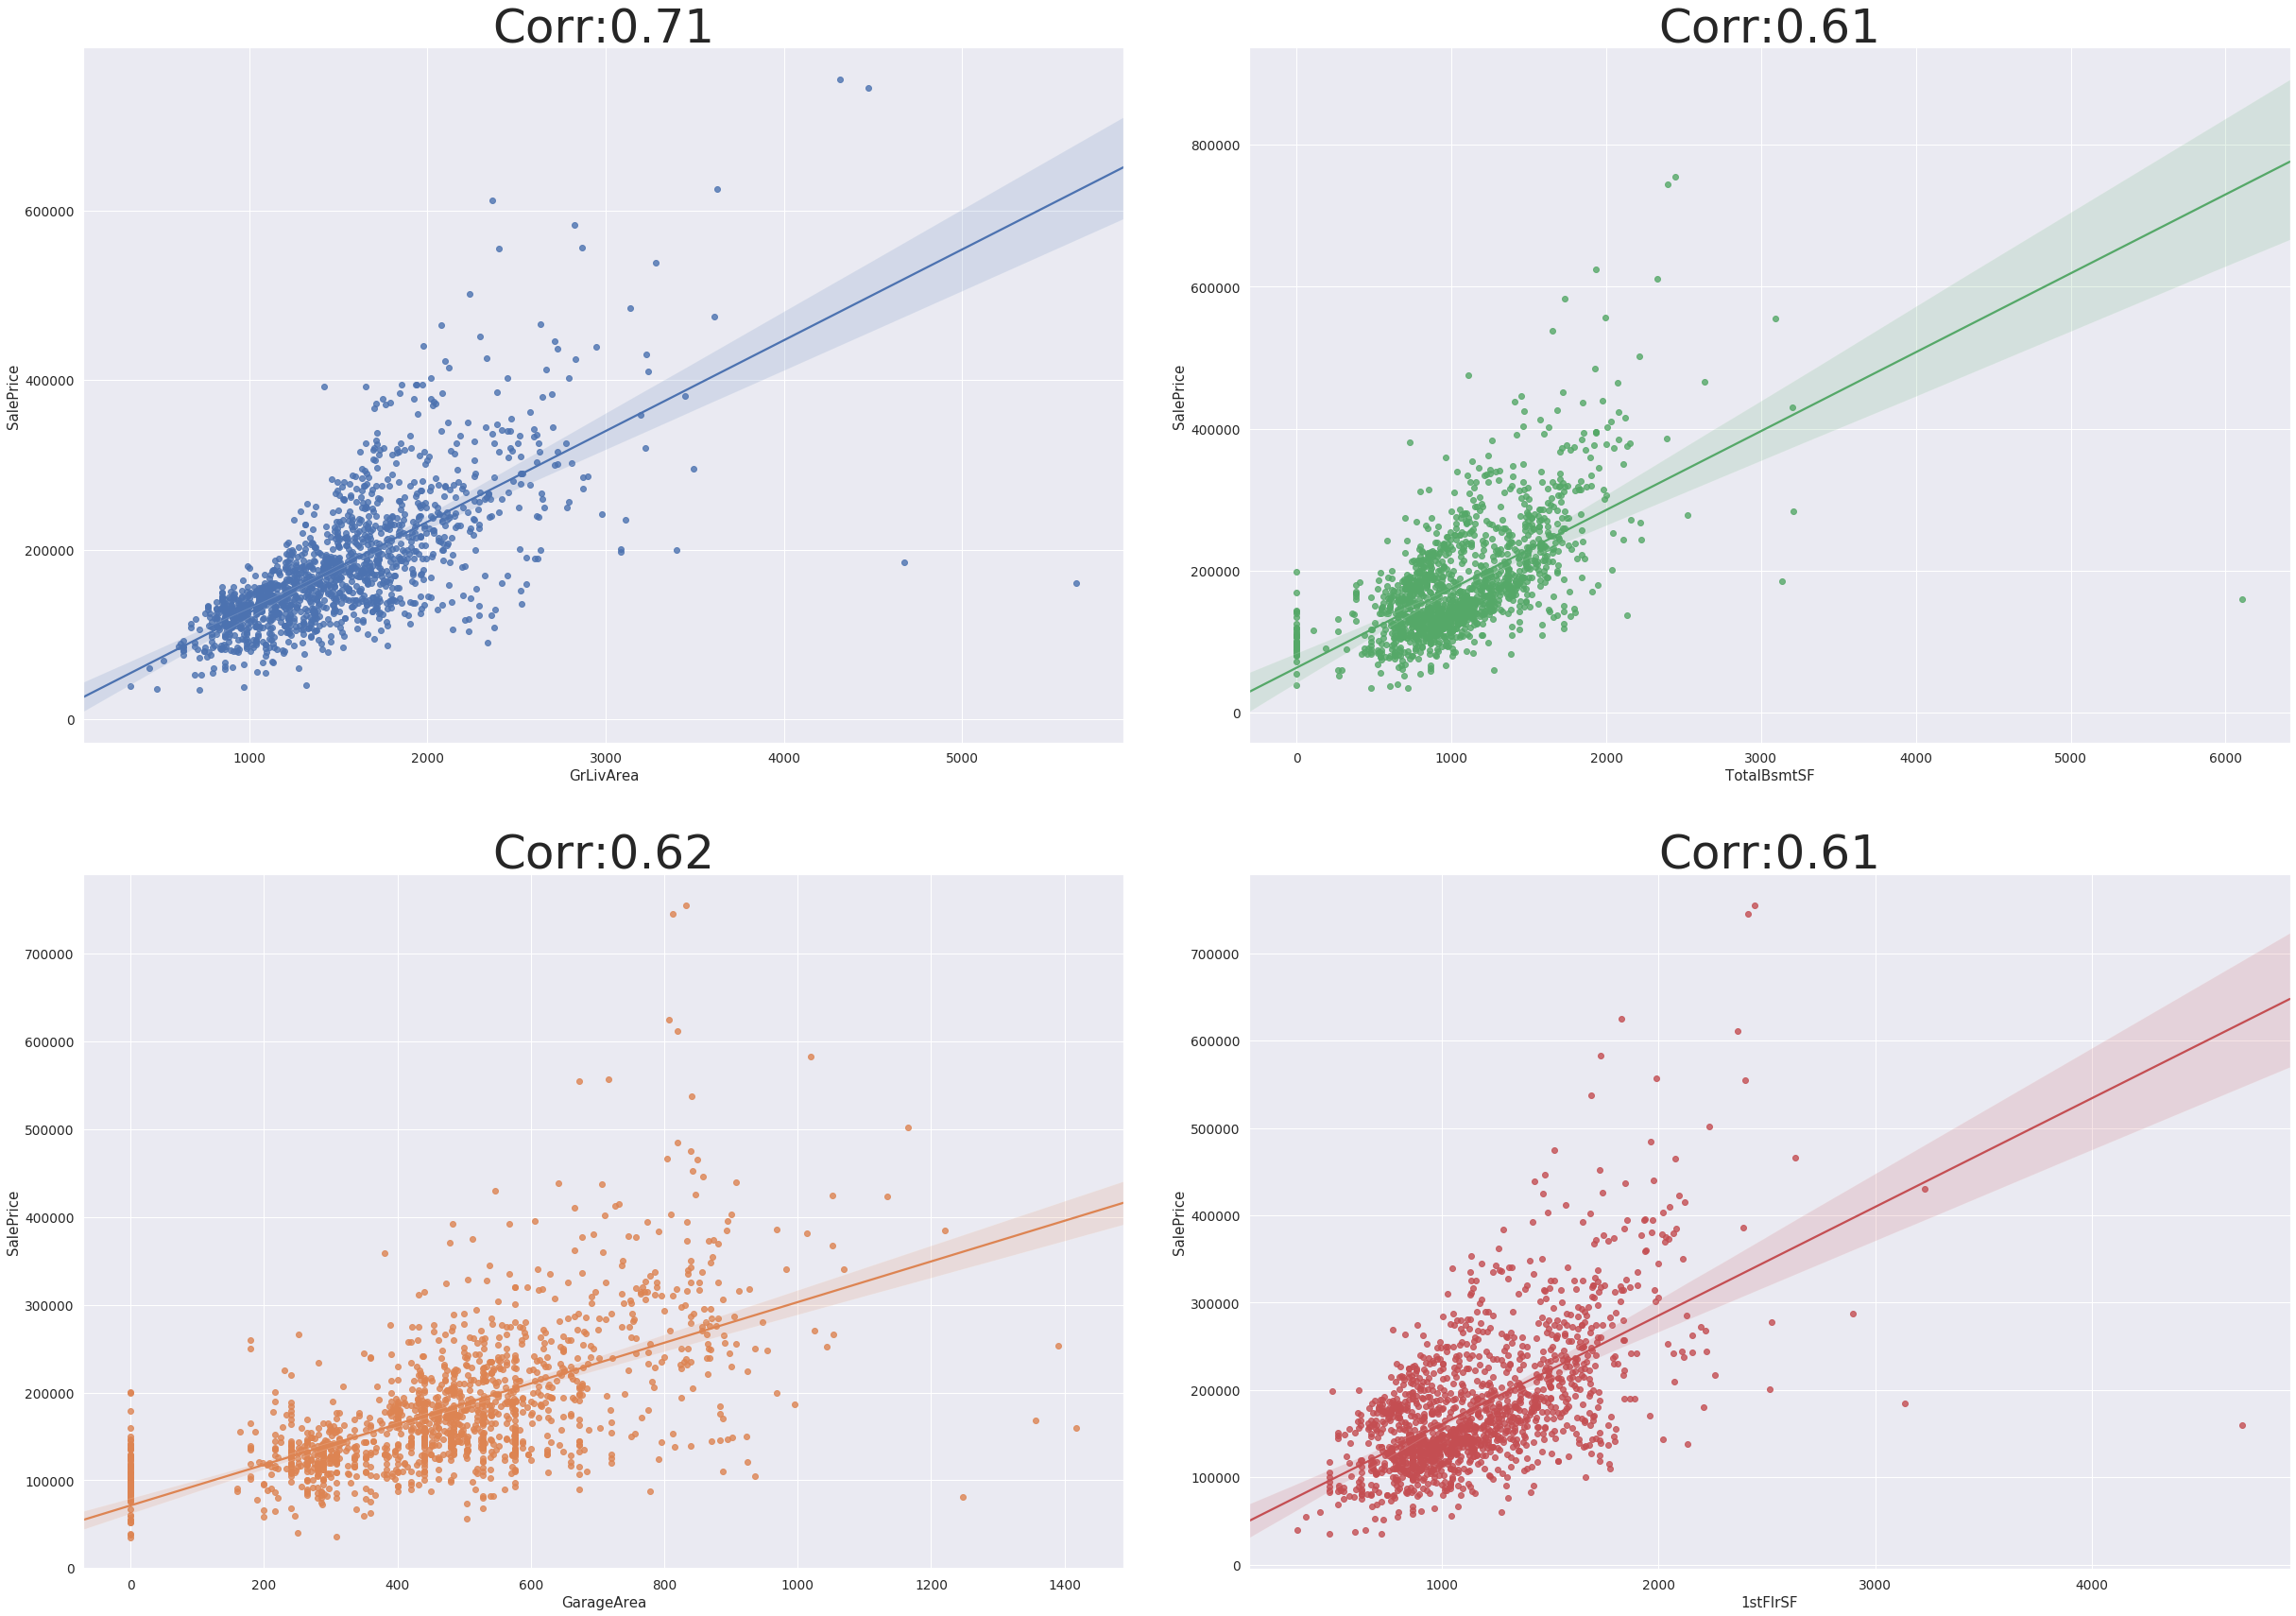

In [26]:
rcParams['figure.figsize'] = (35, 25)
fig, axes = plt.subplots(2, 2)
sns.set(font_scale=4)
for i in range(len(continuous)):
    if i < 2:
        pp = sns.regplot(data=train_df, x=continuous[i], y='SalePrice', ax=axes[i,0])
        pp.set_title('Corr:%.2f' % np.corrcoef(train_df['SalePrice'], train_df[continuous[i]])[0,1],size=50)
    else:
        pp2 = sns.regplot(data=train_df, x=continuous[i], y='SalePrice', ax=axes[i-2,1])
        pp2.set_title('Corr:%.2f' % np.corrcoef(train_df['SalePrice'], train_df[continuous[i]])[0,1],size=50)
    plt.tight_layout()

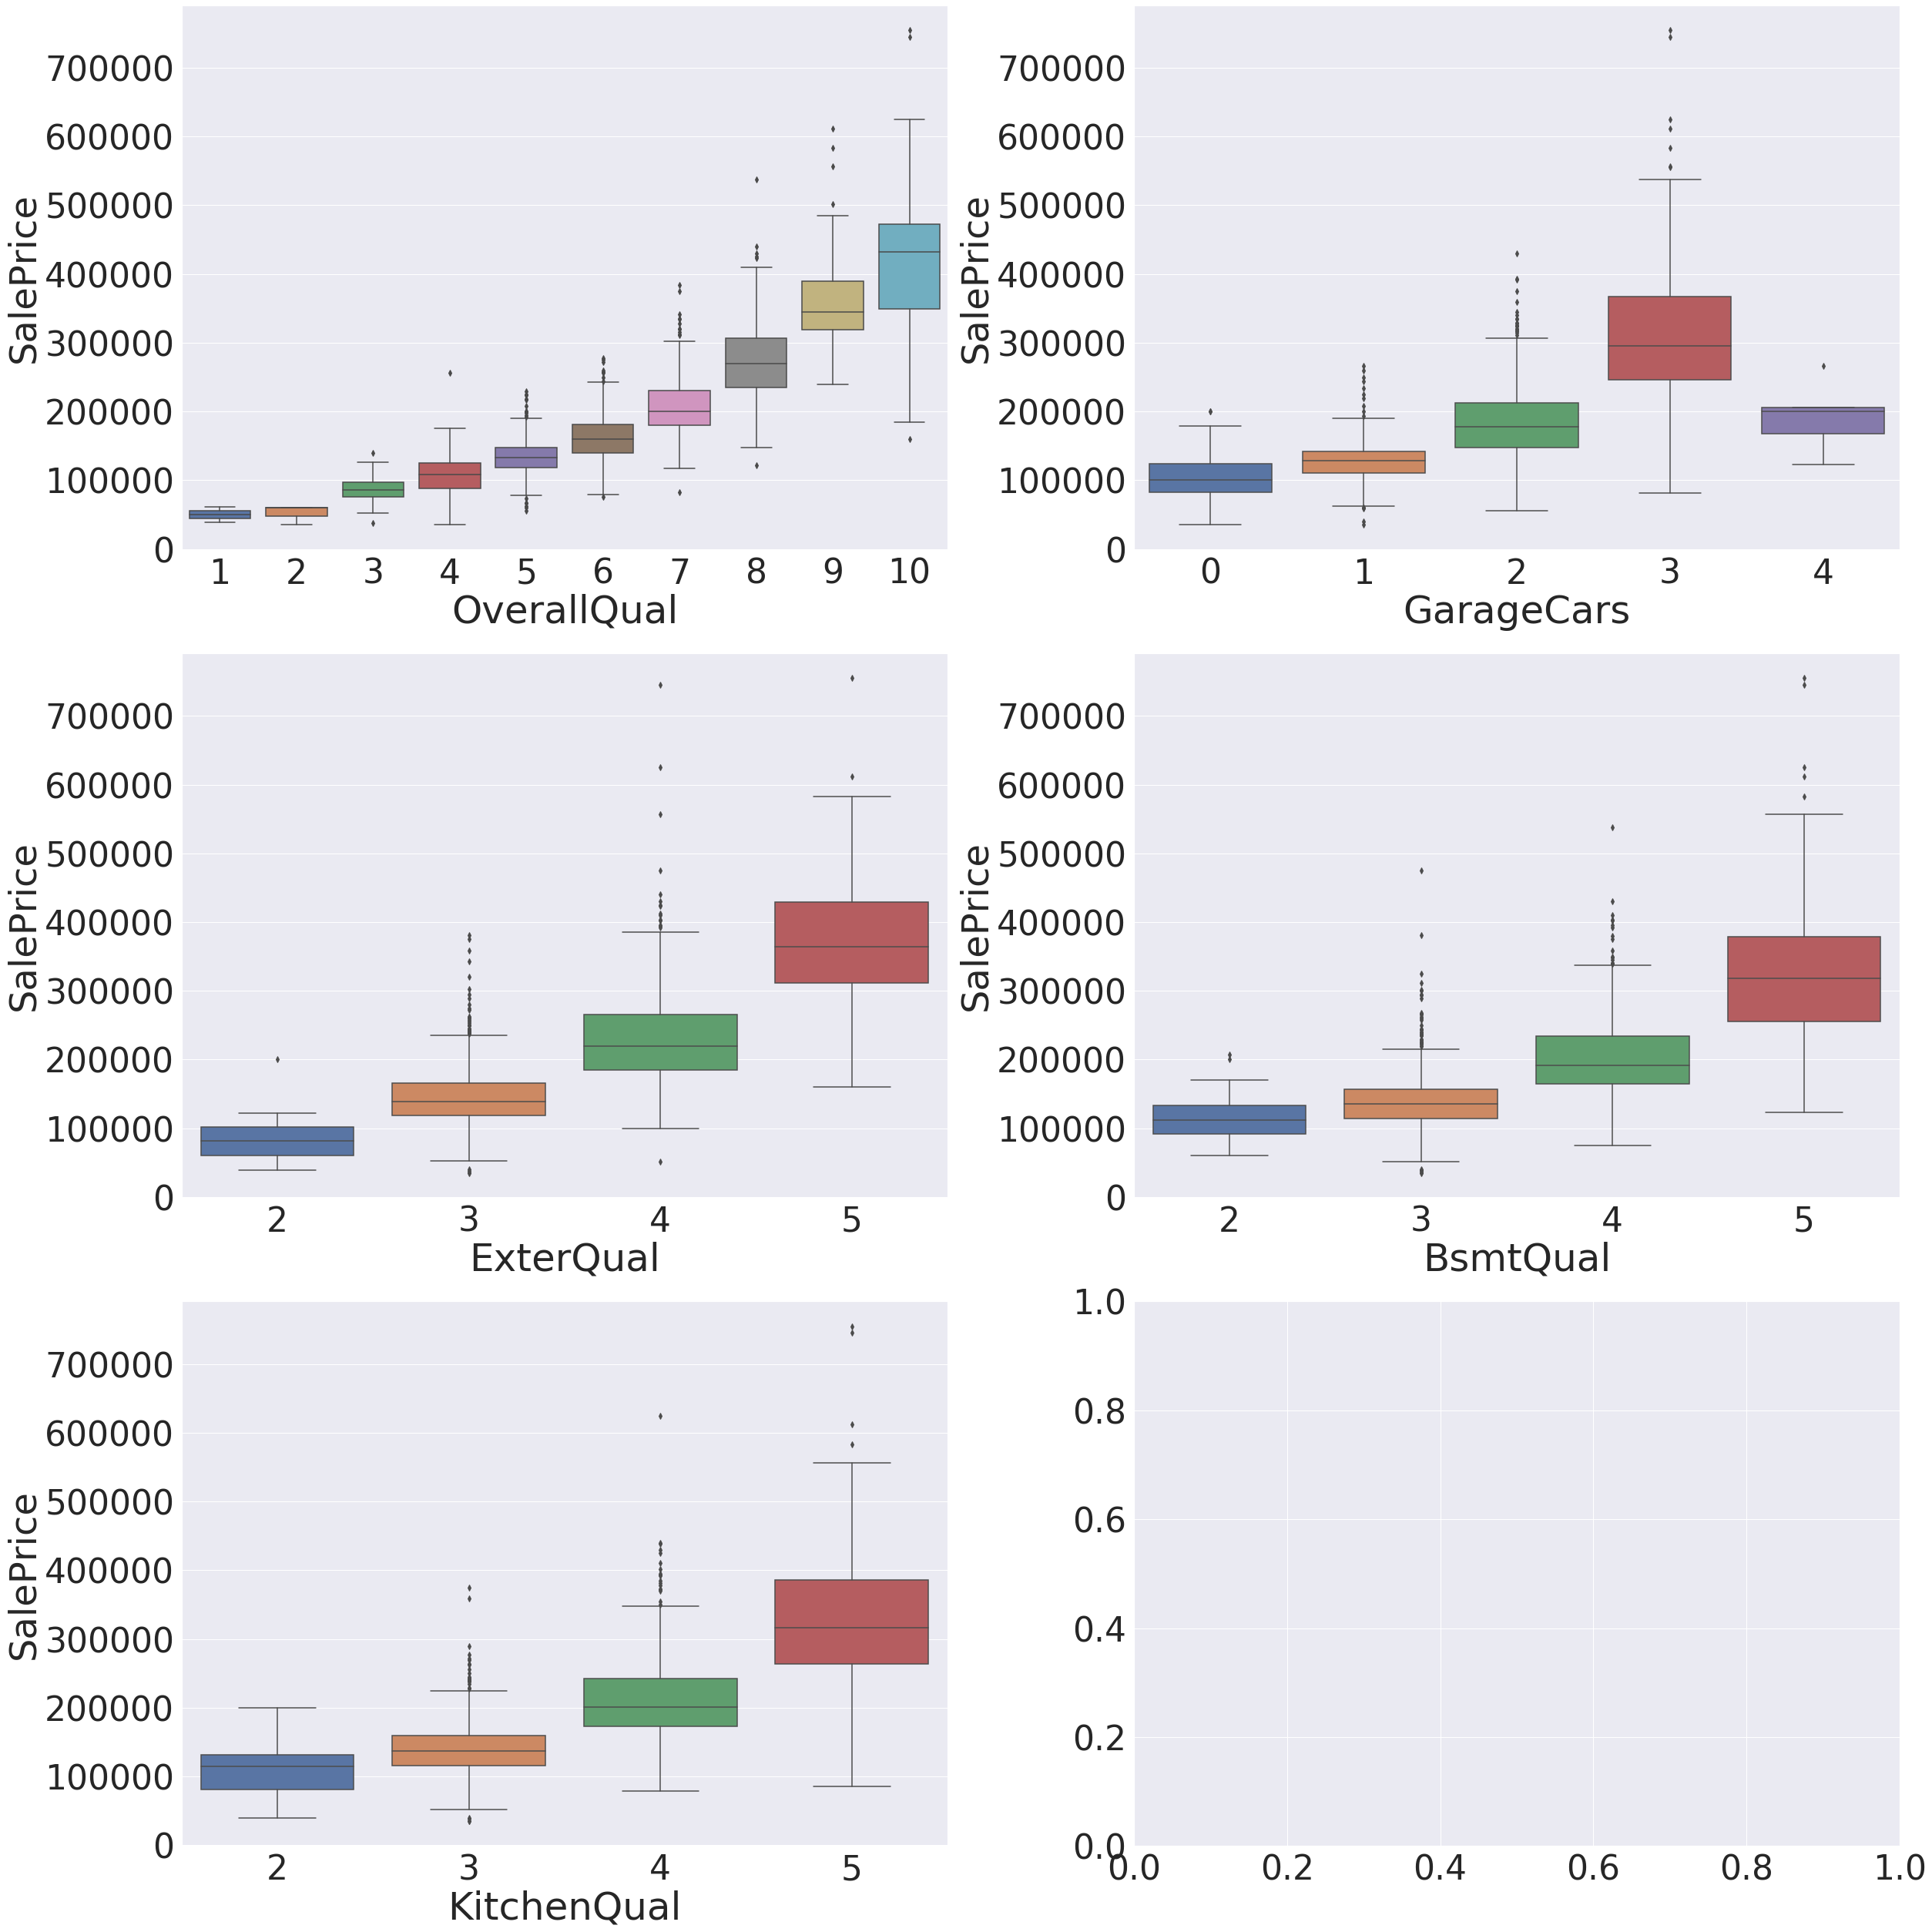

In [27]:
sns.set(font_scale=4)
rcParams['figure.figsize'] = (35,35)
fig, axes = plt.subplots(3, 2)
sns.set(color_codes=True)
for i in range(len(discrete)):
    if i < 3:
        pp = sns.boxplot(data=train_df, x=discrete[i], y='SalePrice', ax=axes[i,0])
        pp.set_xlabel(discrete[i], fontsize=50)
    else:
        pp2 = sns.boxplot(data=train_df, x=discrete[i], y='SalePrice', ax=axes[i-3,1])
        pp2.set_xlabel(discrete[i], fontsize=50)
    plt.tight_layout()

### 針對類別變數，進行OneHotEncode，針對數值變數，進行Rescaling

- 同時進行`OneHotEncode`和`數值變數標準化`，可以看一下Sklearn新的column transformer的用法，是一種簡潔的 Pipline Wrapper. ->> https://www.codercto.com/a/31047.html

In [28]:
X = train_df.copy()
y = X.pop('SalePrice')

num_cols = X.select_dtypes(include=np.number).columns.values
cat_cols = X.select_dtypes(include='object').columns.values

In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder

preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
    ('num', MinMaxScaler(), num_cols)],
    verbose=True)

In [30]:
# Apply 在訓練資料集
X = preprocessor.fit_transform(X)
X.shape

[ColumnTransformer] ........... (1 of 2) Processing cat, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing num, total=   0.0s


(1460, 250)

In [31]:
# Apply 在測試資料集
X_test = preprocessor.transform(test_df.copy())
X_test.shape

(1459, 250)

<font size=5 color="red">
    <b>Strong Baseline:<br>
    </b>
</font>

<font size=3 color="red">
    ◈ 極端值處理: <a href="https://www.thinbug.com/q/46304514">使用 studentized residuals 來去除極端值</a><br>
    ◈ 目標變數轉換: <a href="https://www.anatomisebiostats.com/biostatistics-blog/transforming-skewed-data">使用 .skew() 來計算偏度，針對不同的偏度使用不同的公式去轉換</a><br>
    ◈ 變數篩選: 使用 Lasso 或 Feature importance 來篩選有用的變數<br>
</font>

---

## 3.模型驗證

### 【資料切分】

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=2022, test_size=0.2)

In [33]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [34]:
def rmse(model, X_train, X_val, y_train, y_val):
    model.fit(X_train, y_train)
    pred_train = model.predict(X_train)
    pred_val = model.predict(X_val)
    RMSE_train = np.sqrt(mean_squared_error(y_train, pred_train))
    RMSE_val = np.sqrt(mean_squared_error(y_val, pred_val))
    return RMSE_train, RMSE_val

In [35]:
models = [LinearRegression(), Lasso(), KNeighborsRegressor(), SVR(), 
          DecisionTreeRegressor(), RandomForestRegressor(), 
          XGBRegressor(objective ='reg:squarederror')]

names = ['LR', 'Lasso', 'KNN', 'SVR', 'DT', 'RF', 'XGB']
for name, model in zip(names, models):
    RMSE_train, RMSE_val = rmse(model, X_train, X_val, y_train, y_val)
    print(f'{name}:')
    print(f'　　Training RMSE: {RMSE_train:.4f}, Validation RMSE: {RMSE_val:.4f}')

LR:
　　Training RMSE: 20840.3041, Validation RMSE: 47308369418787776.0000
Lasso:
　　Training RMSE: 20713.2818, Validation RMSE: 36765.0691
KNN:
　　Training RMSE: 36908.6973, Validation RMSE: 40498.0944
SVR:
　　Training RMSE: 82641.5082, Validation RMSE: 77469.0636
DT:
　　Training RMSE: 0.0000, Validation RMSE: 47107.0555
RF:
　　Training RMSE: 14958.6258, Validation RMSE: 28733.1409
XGB:
　　Training RMSE: 14230.5597, Validation RMSE: 24993.0141


In [36]:
# 進行測試集的預測
xgb_pred_y = models[-1].predict(X_test)

# 製作 submit 的資料集
submit_file = pd.DataFrame({'Id': test_df.Id, 'SalePrice': xgb_pred_y})
submit_file.to_csv('./submission.csv', index=False)

<font size=5 color="red">
    <b>Strong Baseline:<br>
    </b>
</font>

<font size=3 color="red">
    ◈ 交叉驗證: 使用 K-Fold 來降低模型訓練對於資料集的偏差 <br>
    ◈ 模型調參: 使用 Grid Search 來尋找好的超參數
</font>

---

## 4.模型集成

<font size=5 color="red">
    <b>Strong Baseline:<br>
    </b>
</font>

<font size=3 color="red">
    ◈ Stacking: 屬於垂直混合的方法，<a href="http://rasbt.github.io/mlxtend/user_guide/regressor/StackingRegressor/">可以使用 mlxtend 這個套件來實現</a><br>
    ◈ Blending: 屬於水平混合的方法，可以使用多種模型預測值的加權平均來實現

</font>

---